# Evaluation

이전 시간에 사용했던 iris data를 이용하여 최적 모델과 그의 파라미터를 구하기 위한 Cross Validation을 수행합니다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.3)
#X_train = iris.data[:120,:]
#Y_train = iris.target[:120]
#X_test = iris.data[120:,:]
#Y_test = iris.target[120:]

5-NN을 이용하여 classfication을 수행합니다

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn = KNeighborsClassifier(n_neighbors=5) #k=5

In [5]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
knn.score(X_test, Y_test)

0.9333333333333333

In [20]:
Y_pred = knn.predict(X_test)

단순히 accuracy만으로 분류기의 성능을 판단하기는 놓치는 것이 많습니다.

confusion matrix를 작성해보고, precision, recall값을 구해봅시다.

In [ ]:
from sklearn.metrics import confusion_matrix

# KNN

최적의 k값을 찾기위해 10-fold cross validation과정을 수행합니다.

In [7]:
from sklearn.model_selection import cross_val_score

테스트할 k값의 리스트를 만듭니다.
k는 일반적으로 홀수값을 이용하므로 filter를 적용하여 리스트의 홀수 인자들만 추출합니다.

**lambda** 인자 : 표현식
lambda는 함수를 간단하게 표현할 수 있게 합니다.


ex)
def mul(a,b):<br>
&nbsp;&nbsp;&nbsp;&nbsp;return a*b
    
mul(3,4)
->12

(lambda x,y:x\*y)(3,4)
->12


In [8]:
k_list = list(range(1,30))
k_list = list(filter(lambda x: x%2 == 1, k_list))

In [9]:
k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

각 k값에 대한 cross validation score를 저장하기 위한 리스트를 만듭니다.

In [10]:
knn_error = []
knn_score = []

In [11]:
for k in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, iris.data, iris.target, cv=10, scoring='accuracy')
    print(scores.mean())
    knn_score.append(scores.mean())
    knn_error.append(1-scores.mean())

0.96
0.9666666666666666
0.9666666666666668
0.9666666666666668
0.9733333333333334
0.9666666666666668
0.9800000000000001
0.9733333333333334
0.9733333333333334
0.9733333333333334
0.9666666666666666
0.9733333333333334
0.9666666666666666
0.9666666666666666
0.9533333333333334


이 score는 cross validation을 수행했을 때 평균 testing accuracy를 나타냅니다.

In [12]:
knn_score

[0.96,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666666,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9533333333333334]

In [13]:
max(knn_score)

0.9800000000000001

이제 5-fold cross validation을 통해 구해진 각 k값에 따른 에러율 알아보기 위해 그래프를 그려보겠습니다.

그래프는 x-axis : k, y-axis :error rate 나타냅니다.

In [14]:
import matplotlib.pyplot as plt

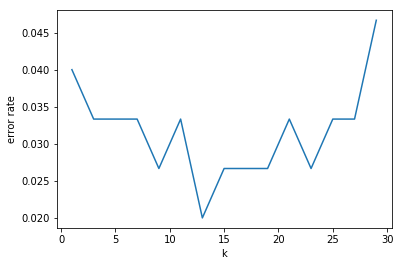

In [15]:
plt.plot(k_list, knn_error)
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

최적 accuracy를 나타내는 k값을 찾습니다.

In [16]:
k_optimal = k_list[knn_error.index(min(knn_error))]

In [17]:
k_optimal

13

# SVM

In [ ]:
from sklearn import svm
import numpy as np

### SVM의 kernel function 선택
data가 선형적으로 분리될 수 있으면(linearly seperable) kernel='linear'를 사용합니다(hyper-parameter:C)

data가 선형적으로 분리되지 않으면(non linearly seperable) 기본값으로 kernel='rbf'를 많이 사용합니다(hyper-parameter:gamma,C).

In [ ]:
clf = svm.SVC(kernel='linear', C=5)
#clf = svm.SVC(gamma=1, C=1)
clf.fit(X_train, Y_train)
clf.predict(X_test)
clf.score(X_test,Y_test)  #test accuracy

C로 설정할 후보를 아래와 같이 리스트에 담습니다.

cv score와 error를 담을 리스트를 정의합니다.

10-fold cross validation을 이용하여 모델의 정확도를 구해봅니다.

In [ ]:
scores = cross_val_score(clf, X_train, Y_train, cv=10)

In [ ]:
scores.mean()

10-fold cross validation을 통해 최적의 C값을 찾습니다.

In [ ]:
for c in c_list:
    svm_cv = svm.SVC(kernel='linear', C=c)
    scores = cross_val_score(svm_cv, iris.data, iris.target, cv=10, scoring='accuracy')
    print(scores.mean())
    svm_score.append(scores.mean())
    svm_error.append(1-scores.mean())

이제 cross validation 실행 결과를 보기 위해 그래프를 그려보겠습니다.

In [ ]:
plt.plot(c_list, svm_error)
plt.xlabel('C')
plt.ylabel('error rate')
plt.show()

최적의 c를 구해봅니다.

In [ ]:
c_optimal = c_list[svm_error.index(min(svm_error))]

In [ ]:
c_optimal